In [2]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

In [17]:
# path = 'C://Users//Dmitry Leshchiner//Desktop//Sigs_24dec//signatures//res_*.csv'
# filenames = glob.glob(path)

# list_df = []

# for i in filenames:
#     df = pd.read_csv(i, index_col=0)
#     df = df[df.p_val_adj < 0.05]
#     df = df[np.abs(df.avg_log2FC) > 1]
#     df.to_csv(i)

In [3]:
path = 'C://Users//Dmitry Leshchiner//Desktop//final_analysis//sRGES_cut//sRGES_*.csv'
filenames = glob.glob(path)

list_df = []

for i in filenames:
    df = pd.read_csv(i, index_col='pert_iname')
    df = df[df.n > 3] # use this only for figure4c
    df = df[['sRGES']]
    df = df.rename(columns={'sRGES':i.split('_')[-1].replace('.csv', '')})
    list_df.append(df)

fin_df = pd.concat(list_df, axis=1).dropna(thresh=1)

In [225]:
# rfd_corr = fin_df.corr()
# sns.clustermap(rfd_corr, figsize=(20, 20), cmap='vlag_r', vmax=1, vmin=-1, center=0)
# plt.tight_layout()
# plt.savefig(f'C:\\Users\\Dmitry Leshchiner\\Desktop\\final_analysis\\plots\\figure4a.pdf', bbox_inches="tight")
# plt.show()

In [6]:
fda_df = fin_df[['PancreaticCancer', 'PancreaticCancer2', 'PancreaticCancer3', 'PancreaticNeuroendocrineCancer', 'PNET']]
# fda_df = fin_df[['ColorectalCancer', 'ColorectalCancer2']]
# fda_df = fin_df[['GastricCancer','GastrointestinalNeuroendocrineCancer']]


filter = list(pd.read_csv('C://Users//Dmitry Leshchiner//Desktop//final_analysis//fda_approved.csv')['pert_iname'])
filter = list(set(fda_df.index) & set(filter))

fda_df = fda_df.loc[filter]
fda_df['Sum sRGES'] = fda_df.sum(axis=1)

top_df = fda_df.sort_values(by='Sum sRGES')
# top_df = top_df[top_df.Sum < -1]

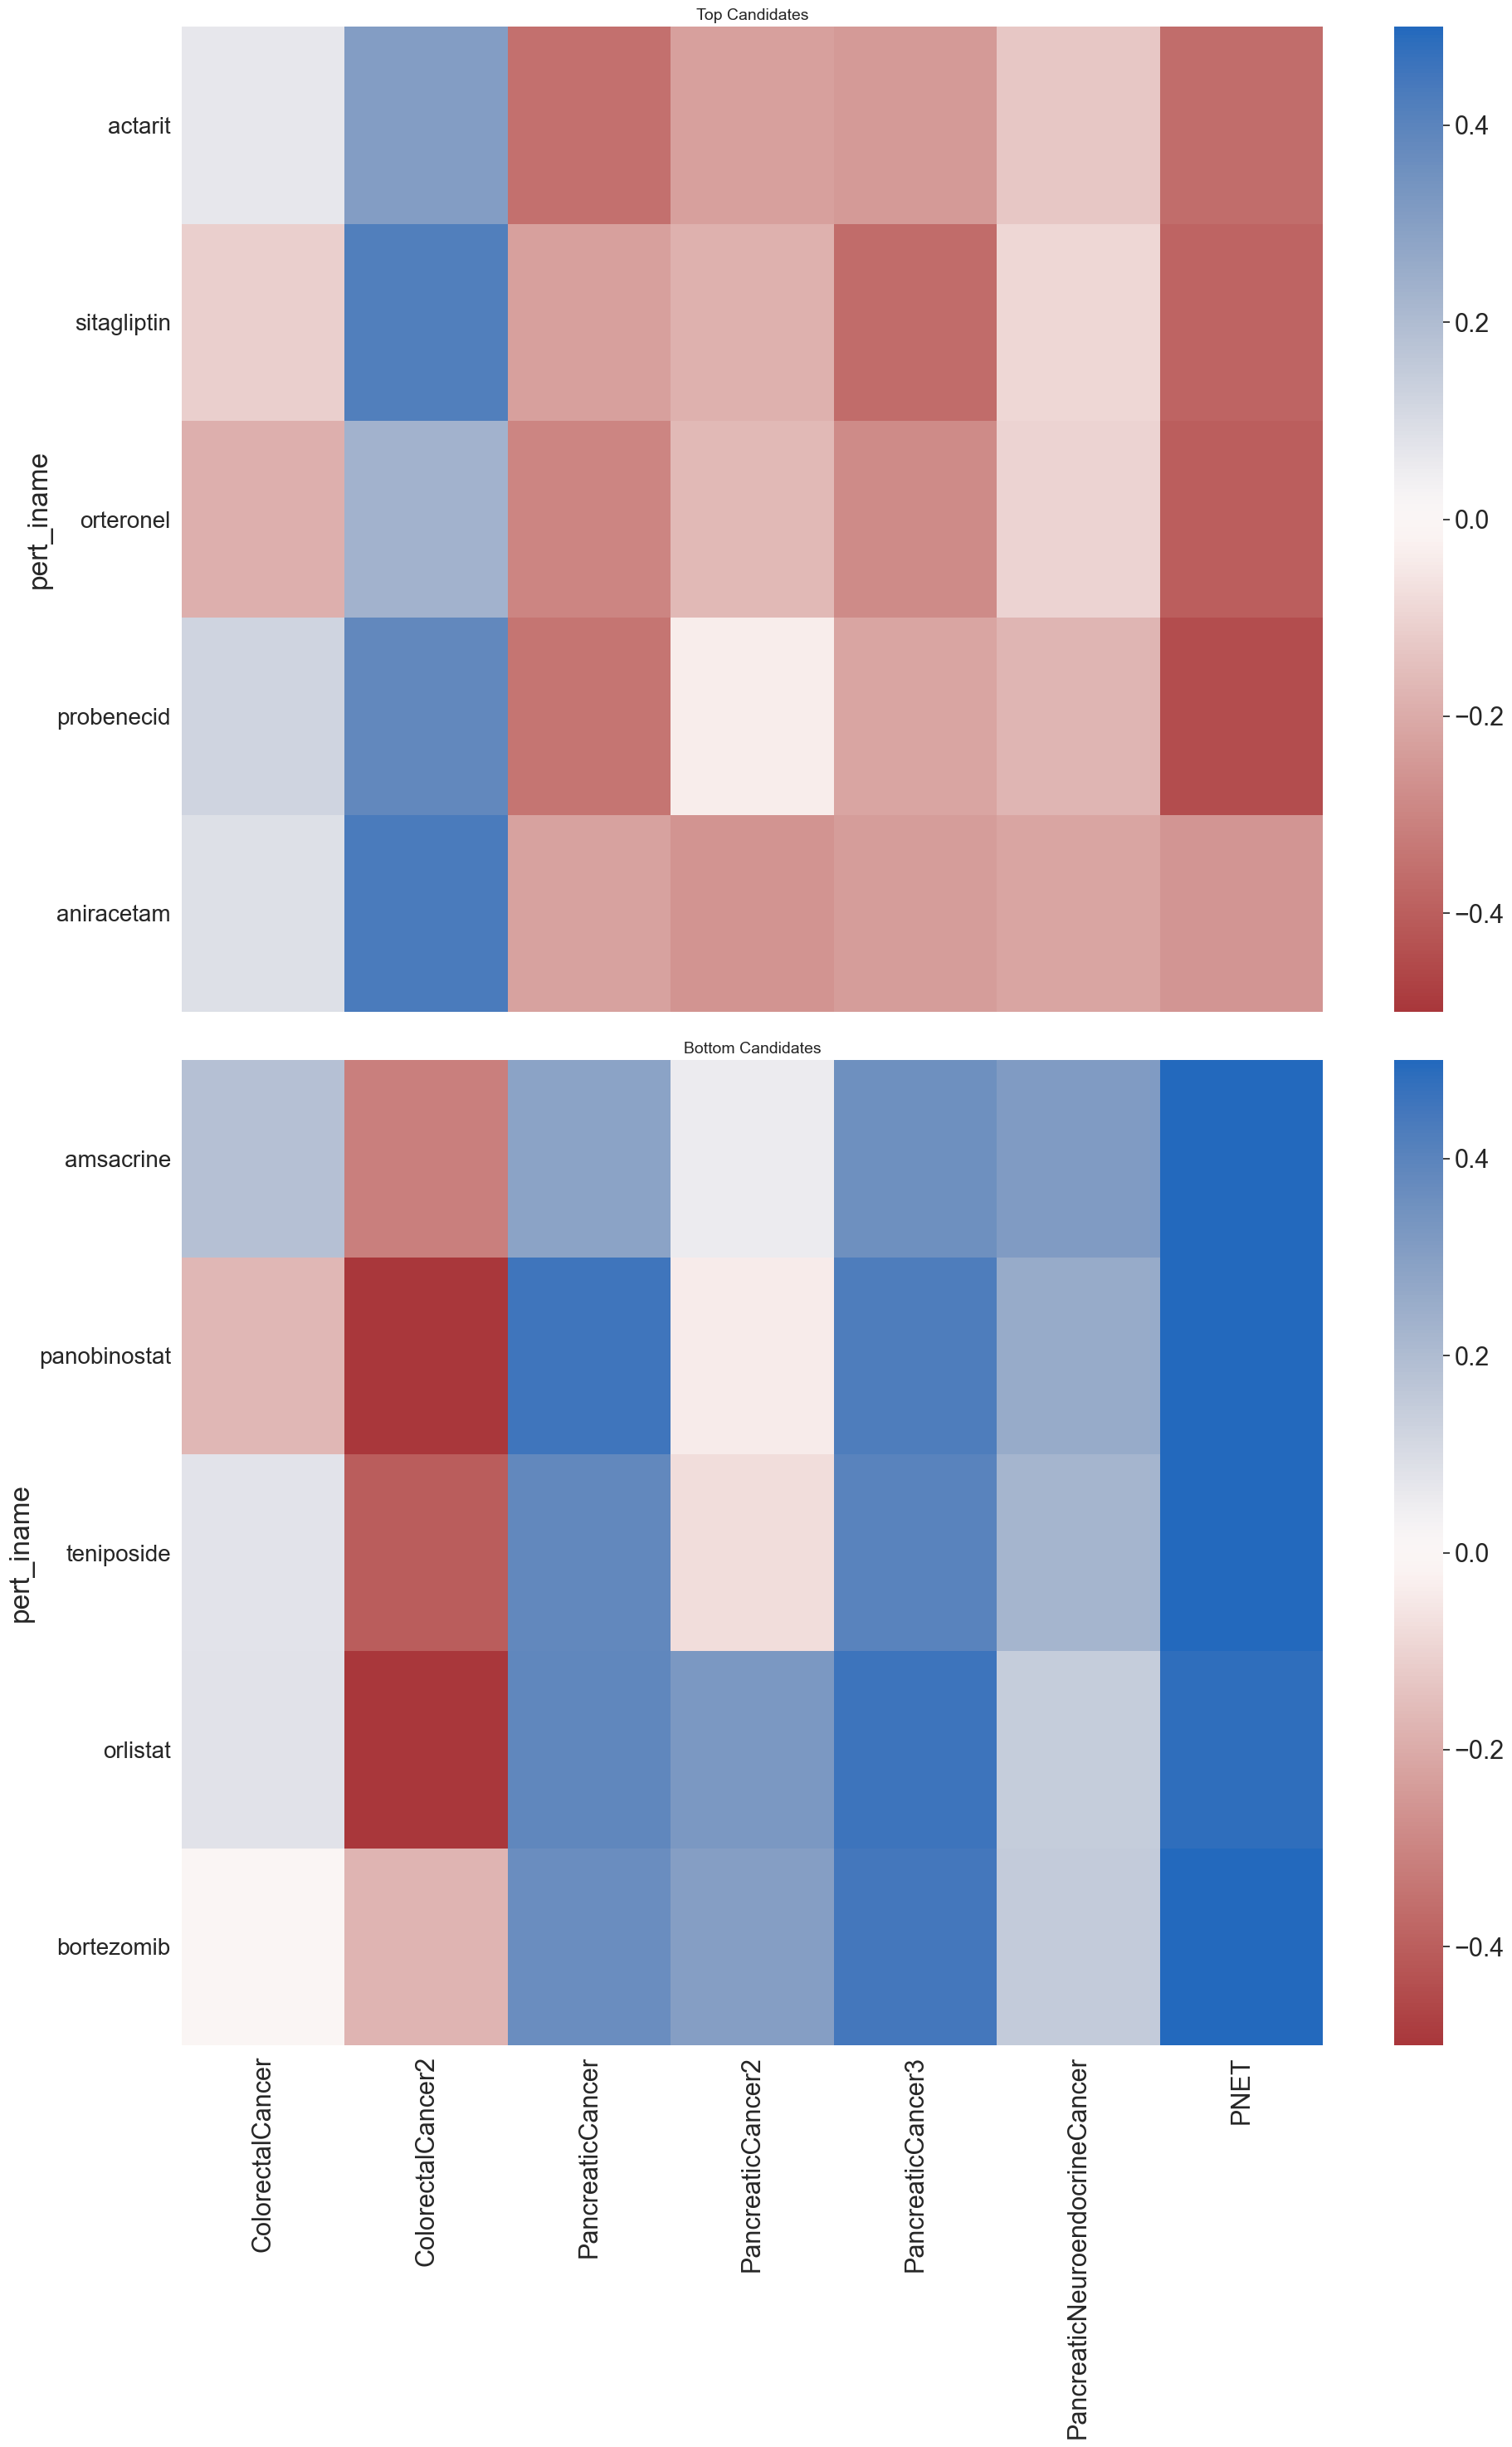

In [40]:
add_df = top_df.drop('Sum sRGES', axis=1).head(5)
colo_df = fin_df[['ColorectalCancer', 'ColorectalCancer2']].loc[add_df.index]
colo_panc_df = pd.concat([colo_df, add_df], axis=1)

addt_df = top_df.drop('Sum sRGES', axis=1).tail(5)
colot_df = fin_df[['ColorectalCancer', 'ColorectalCancer2']].loc[addt_df.index]
colot_panct_df = pd.concat([colot_df, addt_df], axis=1)

sns.set(font_scale=2)
FIG, axes = plt.subplots(2, 1, figsize=(20, 30), gridspec_kw={'height_ratios': [1, 1]})
sns.heatmap(colo_panc_df, center=0, vmin=-0.5, vmax=0.5, cmap='vlag_r', xticklabels=False, ax=axes[0])
sns.heatmap(colot_panct_df, center=0, vmin=-0.5, vmax=0.5, cmap='vlag_r', ax=axes[1])

axes[0].set_title('Top Candidates', fontsize=14)
axes[0].set_xlabel(None)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=20)
axes[1].set_title('Bottom Candidates', fontsize=14)
axes[1].set_xlabel(None)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=20)
plt.savefig(f'C:\\Users\\Dmitry Leshchiner\\Desktop\\final_analysis\\plots\\figure4c_colopanc.pdf', bbox_inches="tight")
plt.tight_layout()
plt.show()

In [42]:
# metsig_df = fda_df.loc[['metformin', 'sitagliptin', 'glimepiride', 'pioglitazone', 'rosiglitazone', 'glipizide']].T
# clst = sns.clustermap(metsig_df, figsize=(20, 20), cmap='vlag_r', vmax=0.3, vmin=-0.38, center=0)
# plt.title('Anti-Diabetic Drugs in Pancreatic Cancer', fontsize=20)
# plt.setp(clst.ax_heatmap.get_yticklabels(), rotation=0, fontsize=20)
# plt.setp(clst.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20)
# plt.savefig(f'C:\\Users\\Dmitry Leshchiner\\Desktop\\final_analysis\\plots\\figure4d.pdf', bbox_inches="tight")
# plt.tight_layout()
# plt.show()
# metsig_df.to_csv('C://Users//Dmitry Leshchiner//Desktop//final_analysis//adiabetic_panc.csv')

In [12]:
# clst = sns.clustermap(top_df.drop('Sum sRGES', axis=1).head(15), figsize=(20, 40), cmap='vlag_r', vmax=0.5, vmin=-0.5, center=0)
# plt.title('Pancreatic Cancer', fontsize=20)
# plt.setp(clst.ax_heatmap.get_yticklabels(), rotation=0, fontsize=20)
# plt.setp(clst.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20)
# plt.savefig(f'C:\\Users\\Dmitry Leshchiner\\Desktop\\final_analysis\\plots\\figure4c_panc.pdf', bbox_inches="tight")
# plt.tight_layout()
# plt.show()

In [45]:
lincs_sigs = pd.read_csv('C://Users//Dmitry Leshchiner//Desktop//lincs_sigs.csv', index_col=0)
lincs_info = pd.read_csv('C://Users//Dmitry Leshchiner//Desktop//lincs_FDA.csv', index_col=0)
lincs_info['mark'] = lincs_info.cell_id + '_' + lincs_info.pert_iname
lincs_info['id'] = lincs_info['id'].astype('str')

lincs_dict = lincs_info[['id', 'mark']].set_index('id').to_dict()['mark']

In [105]:
# path = 'C://Users//Dmitry Leshchiner//Desktop//final_analysis//signaturescut//res_*.csv'
# filenames = glob.glob(path)

# for i in filenames:
#     df = pd.read_csv(i, index_col=0)
#     sam = i.split('res_')[-1].split('.')[0]
#     drug_cols = list(lincs_info[lincs_info.pert_iname == 'metformin'].id.astype('str'))
#     lincs_profile = lincs_sigs[drug_cols]
#     common_ind = list(set(df.index) & set(lincs_profile.index))
#     sig_drugs = lincs_profile.loc[common_ind]
#     metasig = df.loc[common_ind]
#     metasig = metasig.sort_values(by='log2FoldChange')
#     sig_drugs = sig_drugs.reindex(metasig.index)
#     sig_drugs.columns = sig_drugs.columns.map(lincs_dict)
#     FIG, axes = plt.subplots(2, 1, figsize=(25, 15), gridspec_kw={'height_ratios': [1, 3]})
#     sns.heatmap(metasig[['log2FoldChange']].T, center=0, vmin=-1.5, vmax=1.5, cmap='coolwarm', \
#                 xticklabels=False, cbar=False, ax=axes[0])
#     sns.heatmap(sig_drugs.T, center=0, vmin=-1.5, vmax=1.5, cmap='coolwarm', cbar=False, \
#                 xticklabels=False, ax=axes[1])
#     axes[0].set_title(f'Signature: {sam}', fontsize=14)
#     axes[0].set_xlabel(None)
#     axes[0].set_yticklabels(['Log2 Fold Change'], rotation=0)
#     axes[1].set_title('Top Candidates (All Samples)', fontsize=14)
#     axes[1].set_xlabel(None)
#     axes[1].set_yticklabels(axes[1].get_yticklabels())
#     plt.tight_layout()

In [46]:
path = 'C://Users//Dmitry Leshchiner//Desktop//final_analysis//signaturescut//res_P*n*.csv'
filenames = glob.glob(path)

drugs = ['metformin', 'sitagliptin']
for drug_of_interest in drugs:
    for i in filenames:
        df = pd.read_csv(i, index_col=0)
        sam = i.split('res_')[-1].split('.')[0]
        drug_cols = list(lincs_info[lincs_info.pert_iname == drug_of_interest].id.astype('str'))
        lincs_profile = lincs_sigs[drug_cols]
        common_ind = list(set(df.index) & set(lincs_profile.index))
        sig_drugs = lincs_profile.loc[common_ind]
        metasig = df.loc[common_ind]
        metasig = metasig.sort_values(by='log2FoldChange')
        sig_drugs = sig_drugs.reindex(metasig.index)
        sig_drugs = DataFrame(sig_drugs.mean(axis=1))
        FIG, axes = plt.subplots(2, 1, figsize=(25, 15), gridspec_kw={'height_ratios': [1, 1]})
        sns.heatmap(metasig[['log2FoldChange']].T, center=0, vmin=-1.5, vmax=1.5, cmap='coolwarm', \
                    xticklabels=False, cbar=False, ax=axes[0])
        sns.heatmap(sig_drugs.T, center=0, vmin=-1.5, vmax=1.5, cmap='coolwarm', \
                    xticklabels=False, cbar=False, ax=axes[1])

        axes[0].set_title(f'Signature: {sam}', fontsize=14)
        axes[0].set_xlabel(None)
        axes[0].set_yticklabels(['Log2 Fold Change'], rotation=0)
        axes[1].set_title(drug_of_interest.capitalize(), fontsize=14)
        axes[1].set_xlabel(None)
        axes[1].set_yticklabels(['Log2 Fold Change'], rotation=0)
        plt.tight_layout()
        plt.savefig(f'C:\\Users\\Dmitry Leshchiner\\Desktop\\final_analysis\\plots\\figure4b_{sam}_{drug_of_interest}.pdf', bbox_inches="tight")
        plt.close()